<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>


#**Deep Learning: Image Classification with CNN.**

# ✿

### **Task and Dataset Info :**

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

In [79]:
#command to install tensorflow installs the TensorFlow library
!pip install tensorflow

# Import Libraries

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 10)
sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [81]:
import tensorflow as tf

# List all available physical devices (CPUs and GPUs)
physical_devices = tf.config.list_physical_devices()
print("Available physical devices:", physical_devices)

# List only GPU devices
gpu_devices = tf.config.list_physical_devices("GPU")
print("Available GPU devices:", gpu_devices)

# Check the number of GPUs available
num_gpus = len(gpu_devices)
print("Number of GPUs available:", num_gpus)


Available physical devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Available GPU devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Number of GPUs available: 1


#**Loading dataset:**

In [82]:
# Load the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
#Dividing dataset to 4 parts:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


In [83]:
#Understanding the dataset dataset
print(f"There are {len(X_train)} images in the training dataset")
print(f"There are {len(X_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


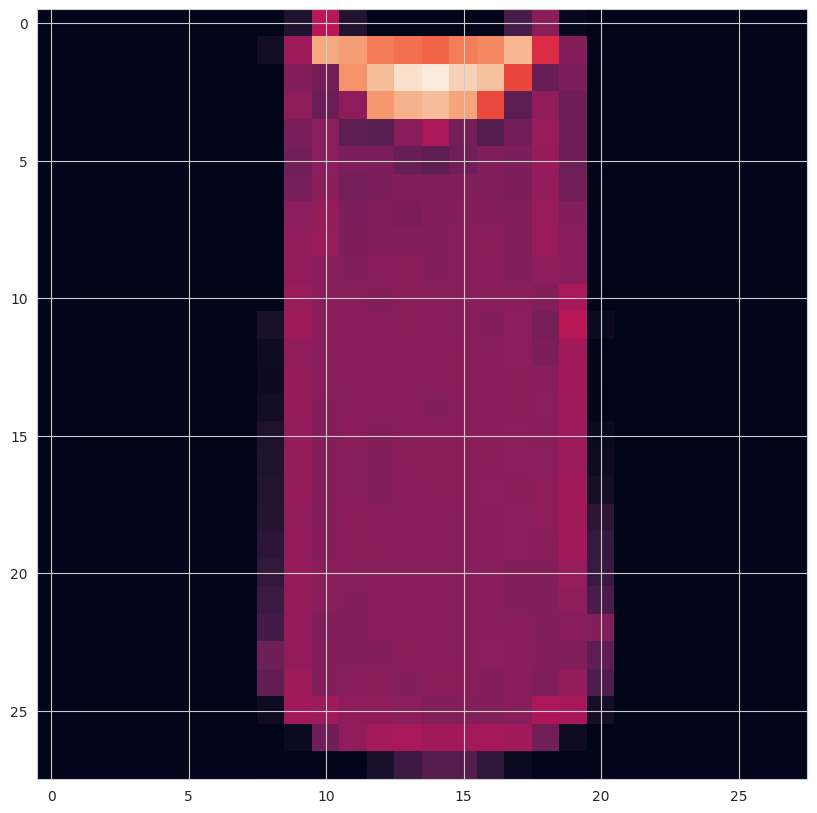

In [84]:
#Understanding the dataset by displays the third image in the training set using the
plt.imshow(X_train[2])

In [85]:
# Checking the shape of one image
print( X_train.shape)
print( y_train.shape)

(60000, 28, 28)
(60000,)


#**Visualization:**

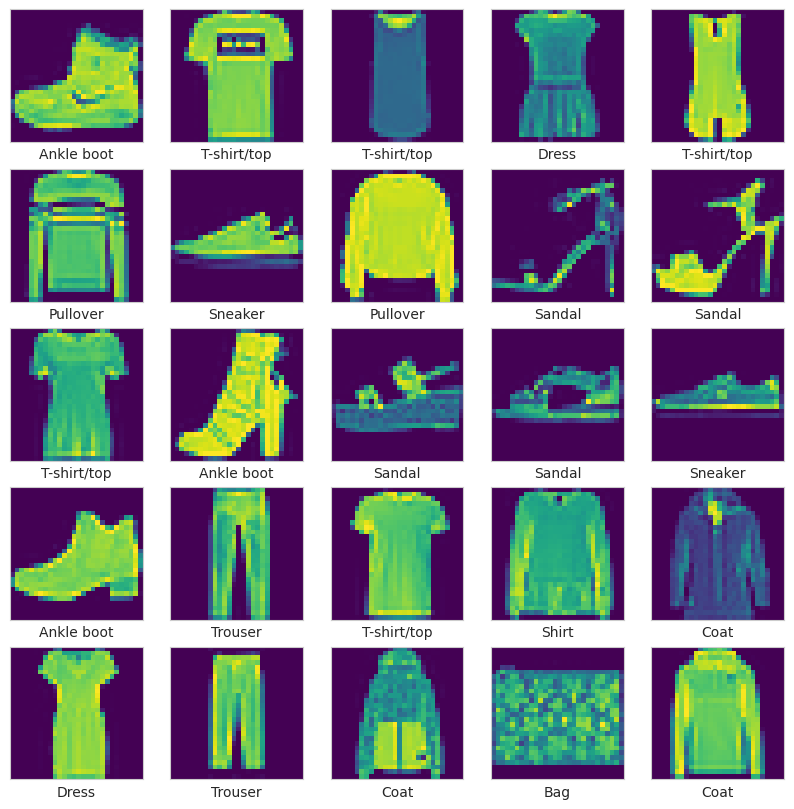

In [86]:
# Define class names for visualization
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]
# Loop to display each image
for i in range(25):
    # Create subplots (5 rows, 5 columns), index i + 1
    plt.subplot(5, 5, i + 1)

    # Remove ticks and grid lines for a clean look
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the image using e colormap
    plt.imshow(X_train[i], cmap='viridis')

    # Set the label for the image, using class_names and the corresponding label from the dataset
    plt.xlabel(class_names[y_train[i]])

# Show the grid of images
plt.show()

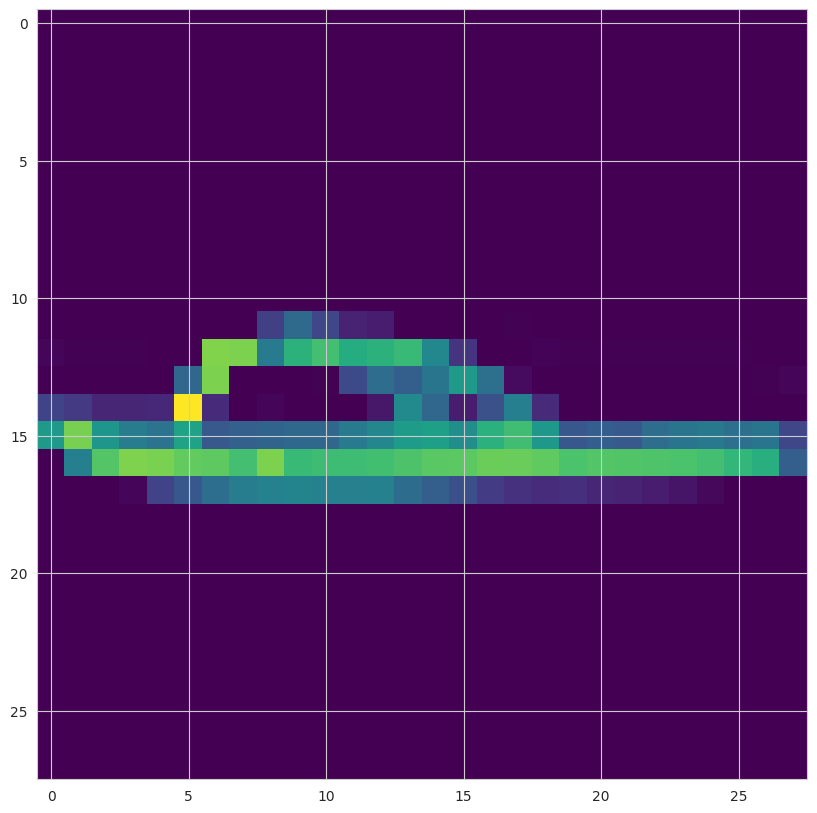

In [125]:
#displaying an image from a dataset,
#along with its corresponding class name. It appears to use Matplotlib (plt) to visualize the image
index = 30
plt.figure()
plt.imshow(X_train[index], cmap='viridis')
plt.show()

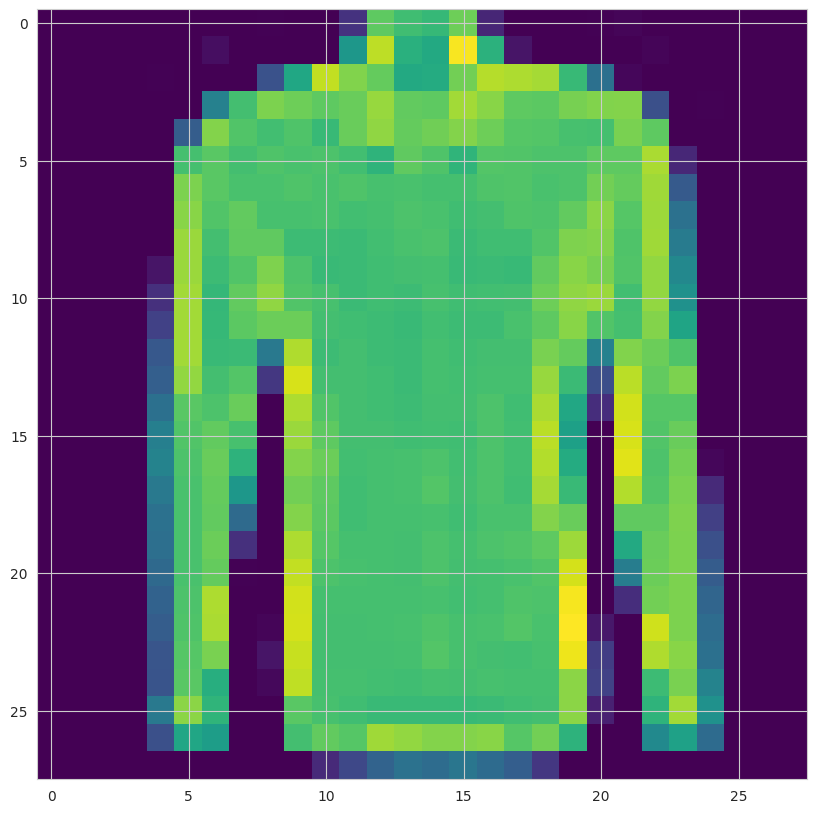

In [127]:
index = 40
plt.figure()
plt.imshow(X_train[index], cmap='viridis')
plt.show()

# **Data Preprocessing**

**To normalize the pixel values in the X train and X test data, you can divide each pixel value by the maximum value (255 in the case of 8-bit grayscale images). This will scale the pixel values to the range [0, 1].**

In [87]:
#finds the minimum value in the fifth row of the training data matrix X_train.
X_train[5].min()

0

In [88]:
# finds the maximum value in the fifth row of the training data matrix X_train.
X_train[5].max()

255

In [89]:
# Normalize the X train and X test data
X_train = X_train.astype("float")
X_test = X_test.astype("float")
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0


**The code X_train = X_train.astype("float") and X_test = X_test.astype("float") converts the training and test data matrices X_train and X_test to float type. This is necessary for most machine learning algorithms, which expect the input data to be in float format. The code X_train_normalized = X_train / 255.0 and X_test_normalized = X_test / 255.0 normalizes the training and test data matrices by dividing them by 255.0. This is a common practice in machine learning, as it can help to improve the performance of the model.**

In [90]:
print(X_train[5].min())
print(X_train[5].max())

0.0
255.0


In [91]:
print(X_test.shape)
print(X_train.shape)

(10000, 28, 28)
(60000, 28, 28)


In [92]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [93]:
print("X_train shape -> ", X_train.shape)
print("y_train shape -> ", y_train.shape)
print("X_valid shape -> ", X_test.shape)
print("y_valid shape -> ", y_test.shape)

X_train shape ->  (60000, 28, 28)
y_train shape ->  (60000,)
X_valid shape ->  (10000, 28, 28)
y_valid shape ->  (10000,)


**CNNs are a type of deep learning model that are well-suited for image classification tasks. CNNs work by extracting features from images using a series of convolutional and pooling layers. The features extracted from the images are then used to train a classifier, such as a logistic regression or softmax classifier. In order to use a CNN model for image classification, the input data must be in the correct shape. The expected shape for the input data is (num_samples, height, width, channels). The reshape() method in NumPy allows us to reshape an array to any desired shape. To reshape the training and test data matrices to the expected shape for a CNN model, we use the following code:**

In [94]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [95]:
from tensorflow.keras.utils import to_categorical
#function converts a class vector (integers) to a binary class matrix.
#This is necessary for use with many classification loss functions
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Modeling

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [97]:
#: This line initializes a sequential model. A sequential model is a linear stack of layers, where you can add one layer at a time.
model = Sequential()
# Here, a convolutional layer is added to the model. This layer is responsible for learning and extracting features from images.
#This defines the shape of the input data. In this case, it's a 28x28 pixel grayscale image
model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28,28,1), activation="relu"))
model.add(MaxPool2D(pool_size = (2, 2), strides = (1,1)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

In [98]:
for layer in model.layers:
    print(layer.name, layer.get_config(), layer.output_shape)

conv2d_1 {'name': 'conv2d_1', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': (None, 28, 28, 1), 'filters': 28, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} (None, 26, 26, 28)
max_pooling2d_1 {'name': 'max_pooling2d_1', 'trainable': True, 'dtype': 'float32', 'pool_size': (2, 2), 'padding': 'valid', 'strides': (1, 1), 'data_format': 'channels_last'} (None, 25, 25, 28)
flatten_1 {'name': 'flatten_1', 'trainable': True, 'dtype': 'float32', 'data_format': 'channels_last'

In [99]:
#display a summary of the model's architecture,
#including the number of parameters in each layer and the overall structure.
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 28)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 17500)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               2240128   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2241698 (8.55 MB)
Trainable params: 2241698 (8.55 MB)
Non-trainable params: 0 (0.00 Byte)
________________

##  Model Training


In [100]:
from tensorflow.keras.callbacks import EarlyStopping
# is used to stop training a neural network model when it is no longer improving on a monitored metric.
#This can help to prevent overfitting and improve the model's performance on unseen data.

In [101]:
#The code you provided is configuring an early stopping callback for a deep learning model.
#Early stopping is a technique used during model training to prevent overfitting and save training time.
#It monitors a specified metric (in this case, "val_accuracy") and
#stops training if the metric stops improving. Let's break down the parameters used in this EarlyStopping callback

In [102]:
early_stop = EarlyStopping(monitor="val_accuracy",
                           mode="max",
                           patience=2,
                           restore_best_weights=True)

In [103]:
model.fit(X_train, y_train,
          # This parameter determines the number of samples that are processed in each iteration (mini-batch) during training.
          #A batch size of 64 means that the model will update its weights after processing 64 training samples.
          batch_size=64,
          #The "epochs" parameter specifies how many times the model will iterate over the entire training datase
          epochs=10,
          validation_data=(X_test, y_test),
          #a list of callback functions to be applied during training
          callbacks=[early_stop])

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 9.5659 - accuracy: 0.8326 - val_loss: 0.3726 - val_accuracy: 0.8749
Epoch 2/10
938/938 [==============================] - 6s 7ms/step - loss: 0.3031 - accuracy: 0.8935 - val_loss: 0.3737 - val_accuracy: 0.8771
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2468 - accuracy: 0.9123 - val_loss: 0.4148 - val_accuracy: 0.8787
Epoch 4/10
938/938 [==============================] - 7s 7ms/step - loss: 0.2166 - accuracy: 0.9248 - val_loss: 0.4229 - val_accuracy: 0.8762
Epoch 5/10
938/938 [==============================] - 7s 7ms/step - loss: 0.1903 - accuracy: 0.9347 - val_loss: 0.5557 - val_accuracy: 0.8770


In [104]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,9.566,0.833,0.373,0.875
1,0.303,0.894,0.374,0.877
2,0.247,0.912,0.415,0.879
3,0.217,0.925,0.423,0.876
4,0.190,0.935,0.556,0.877


<Axes: >

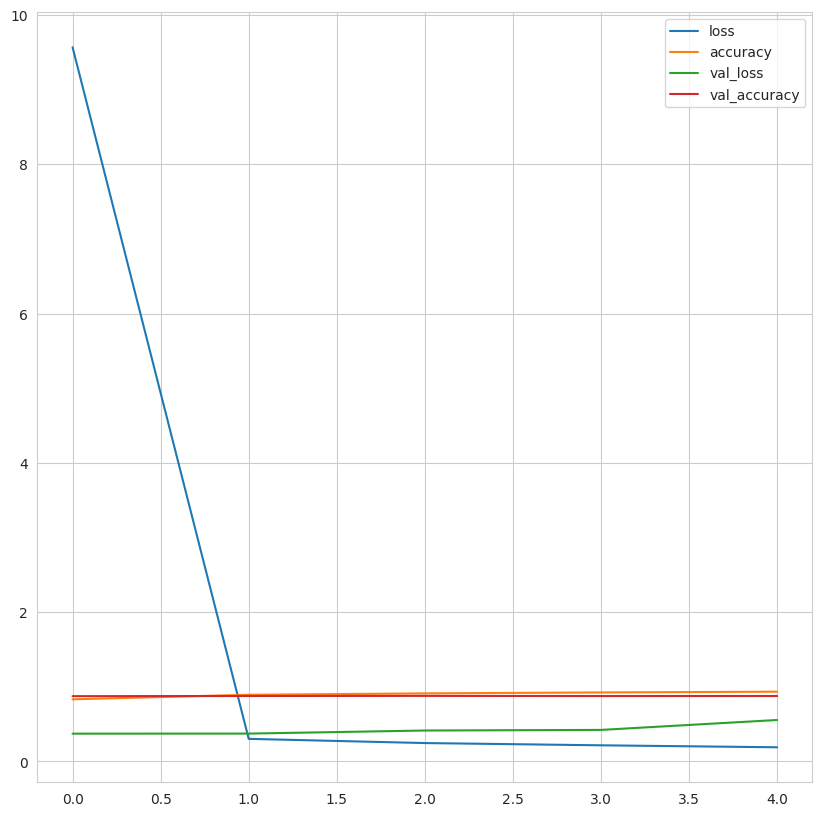

In [105]:
summary.plot()

<Axes: >

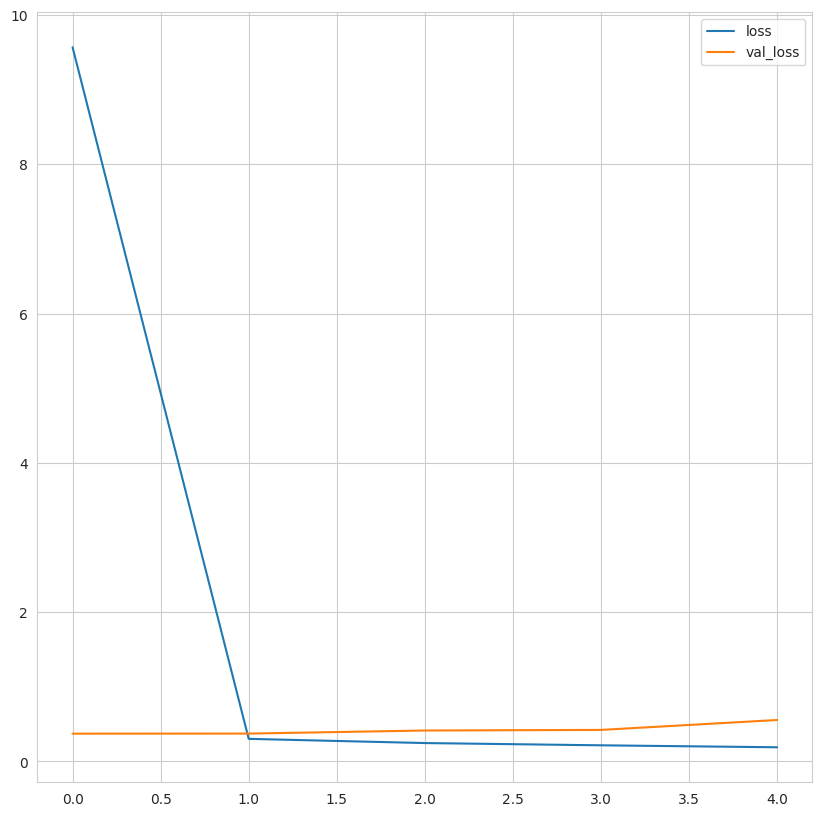

In [106]:
summary[["loss", "val_loss"]].plot()

<Axes: >

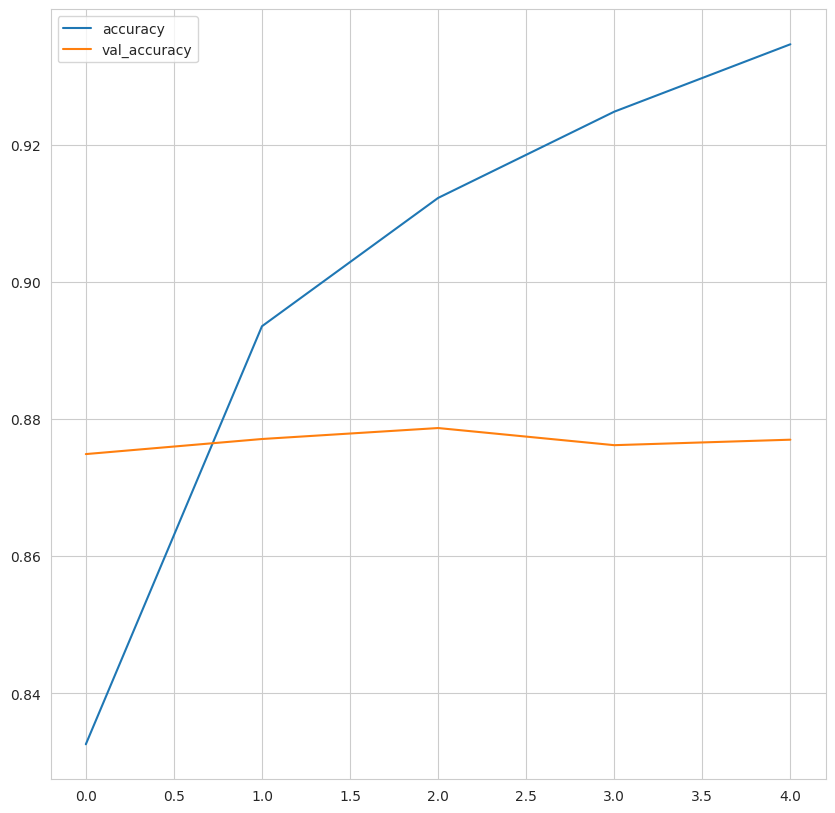

In [107]:
summary[["accuracy", "val_accuracy"]].plot()

## Model Evaluation

In [108]:
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix

In [109]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4148 - accuracy: 0.8787


[0.41480350494384766, 0.8787000179290771]

In [110]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss: ", score[0])
print("Test accuracy", score[1])

Test loss:  0.41480350494384766
Test accuracy 0.8787000179290771


In [111]:
pred_prob = model.predict(X_test)
y_pred = np.argmax(pred_prob, axis=1)


313/313 [==============================] - 1s 2ms/step


In [112]:
pred_prob.shape

(10000, 10)

In [113]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [114]:
y_test_arg=np.argmax(y_test,axis=1)

In [115]:
Y_pred = np.argmax(model.predict(X_test),axis=1)

313/313 [==============================] - 1s 2ms/step


<Axes: >

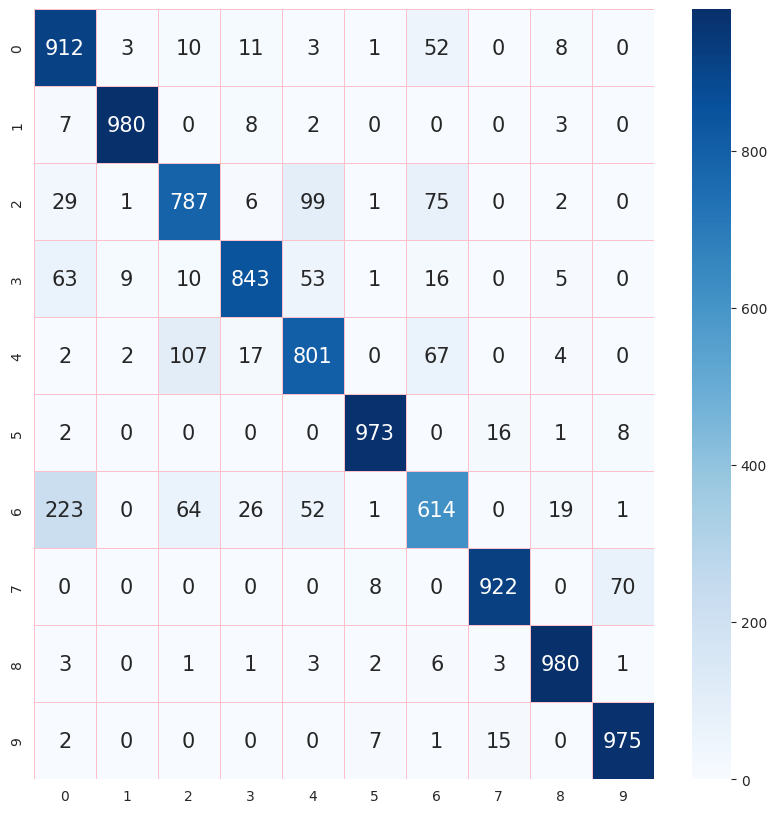

In [116]:
import matplotlib.colors as mcolors

cmap = mcolors.LinearSegmentedColormap.from_list("", ["blue", "white"])
sns.heatmap(confusion_matrix(y_test_arg, Y_pred),
            annot=True, cmap="Blues", linewidth=0.5, linecolor="Pink",
            fmt="g", annot_kws={"size" : 15})

In [117]:
(y_test_arg != Y_pred).sum()

1213

## Prediction

In [118]:
model.save("cnn-1.h5")

In [119]:
model = tf.keras.models.load_model("cnn-1.h5")

In [120]:
pred = model.predict(np.expand_dims(X_test[24], axis=0))
np.argmax(pred)

1/1 [==============================] - 0s 57ms/step


1

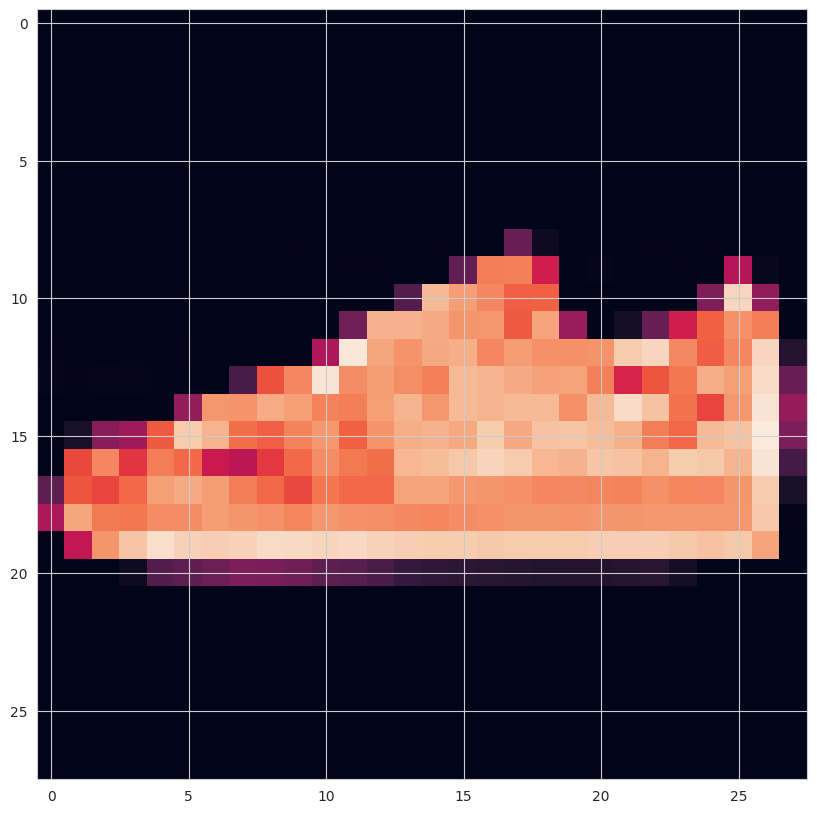

In [121]:
plt.imshow(X_test[22].reshape(28,28))